**Google Colab Lab Assignment -NLP**

Course Name: Deep Learning

Lab Title: NLP Techniques for Text Classification

Student Name: Tejas Gophane

Student ID: 202201040063

Date of Submission: 01-04-2025

Group Members: Shrushty Dhamange , Shivshankar Ghyar

GitHub Link :https://github.com/shiv-1540/DeepLearningCollege/blob/main/DLAssignment03.ipynb

Objective The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.

Learning Outcomes:

Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

Implement text vectorization techniques such as TF-IDF and CountVectorizer.

Develop a text classification model using a machine learning algorithm.

Evaluate the performance of the model using suitable metrics.

**Assignment Instructions:**

**Part 1: NLP Preprocessing**

Dataset Selection:

Choose any text dataset from Best Datasets for Text https://en.innovatiana.com/post/best-datasets-for-text-classification Classification, such as SMS Spam Collection, IMDb Reviews, or any other relevant dataset.

Download the dataset and upload it to Google Colab.

Load the dataset into a Pandas DataFrame and explore its structure (e.g., check missing values, data types, and label distribution).

Text Preprocessing:

Convert text to lowercase.

Perform tokenization using NLTK or spaCy.

Remove stopwords using NLTK or spaCy.

Apply stemming using PorterStemmer or SnowballStemmer.

Apply lemmatization using WordNetLemmatizer.

Vectorization Techniques:

Convert text data into numerical format using TF-IDF and CountVectorizer.

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' data

# Load the dataset
df = pd.read_csv('/mnt/data/IMDB Dataset.csv')

# Explore dataset structure
print(df.info())
print(df.head())
print(df.isnull().sum())  # Check missing values
print(df['sentiment'].value_counts())  # Check label distribution

# Text Preprocessing Functions
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenization
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]  # Apply stemming

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Apply lemmatization

    return ' '.join(tokens)

# Apply preprocessing
df['processed_review'] = df['review'].apply(preprocess_text)

# Vectorization using CountVectorizer and TfidfVectorizer
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

X_count = count_vectorizer.fit_transform(df['processed_review'])
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_review'])

# Convert to DataFrame for better visualization
X_count_df = pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display vectorized output samples
print("Count Vectorizer Representation:")
print(X_count_df.head())
print("TF-IDF Vectorizer Representation:")
print(X_tfidf_df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
review       0
sentiment    0
dtype: int64
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


**Splitting the Data:**

Divide the dataset into training and testing sets (e.g., 80% training, 20% testing).

**Building the Classification Model:**

Train a text classification model using Logistic Regression, Naïve Bayes, or any other suitable algorithm.

Implement the model using scikit-learn.

**Model Evaluation:**

Evaluate the model using accuracy, precision, recall, and F1-score.

Use a confusion matrix to visualize the results.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
review       0
sentiment    0
dtype: int64
sentiment
positive    25000
negative    25000
Name: count, dtype: int64
Accuracy: 0.8617
Precision: 0.8721
Recall: 0.8502
F1-score: 0.8610


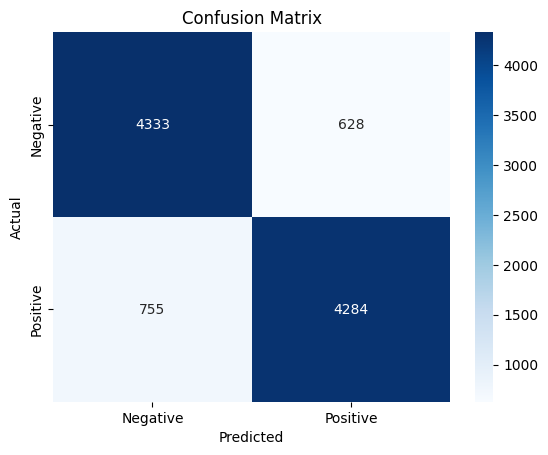

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('/mnt/data/IMDB Dataset.csv')

# Explore dataset structure
print(df.info())
print(df.head())
print(df.isnull().sum())  # Check missing values
print(df['sentiment'].value_counts())  # Check label distribution

# Text Preprocessing Functions
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenization
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]  # Apply stemming

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Apply lemmatization

    return ' '.join(tokens)

# Apply preprocessing
df['processed_review'] = df['review'].apply(preprocess_text)

# Vectorization using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_review'])

# Convert labels to binary (positive = 1, negative = 0)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentiment'], test_size=0.2, random_state=42)

# Building and training the classification model
model = MultinomialNB()
model.fit(X_train, y_train)

# Model predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()